## Reading in and pre-processing the data

In [15]:
#https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

In [5]:
path = "/Users/lawrence/Google Drive/DS/GTSRB/archive/Train/"
data = []; labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(path,str(i)) 
    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data); labels = np.array(labels)
data.shape

(39209, 32, 32, 3)

## Taking a look at some of the images

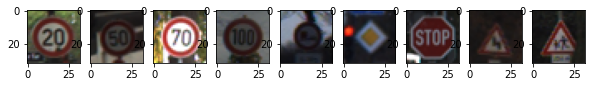

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9)
ax1.imshow(data[1])
ax2.imshow(data[3000])
ax3.imshow(data[7001])
ax4.imshow(data[11000])
ax5.imshow(data[15000])
ax6.imshow(data[19000])
ax7.imshow(data[23000])
ax8.imshow(data[27000])
ax9.imshow(data[31000])


## Preparing the data 

In [9]:
x = data.astype('float32')
y = keras.utils.to_categorical(np.array(labels))

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, shuffle=True,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_val,y_val, test_size=0.5, shuffle=True)

## Creating and fitting a classic MLP model

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               921900    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)              

In [36]:
#Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model
history= model.fit(x_train,y_train, epochs=200, batch_size=32,validation_data=(x_val,y_val))


Epoch 1/200
981/981 [==============================] - 10s 9ms/step - loss: 2.6344 - accuracy: 0.2983 - val_loss: 1.6159 - val_accuracy: 0.5126
Epoch 2/200
981/981 [==============================] - 8s 9ms/step - loss: 1.5688 - accuracy: 0.5354 - val_loss: 0.8936 - val_accuracy: 0.7496
Epoch 3/200
981/981 [==============================] - 7s 7ms/step - loss: 1.1868 - accuracy: 0.6461 - val_loss: 1.0144 - val_accuracy: 0.7348
Epoch 4/200
981/981 [==============================] - 8s 9ms/step - loss: 1.0080 - accuracy: 0.6953 - val_loss: 0.7322 - val_accuracy: 0.8016
Epoch 5/200
981/981 [==============================] - 8s 9ms/step - loss: 0.8784 - accuracy: 0.7357 - val_loss: 0.5624 - val_accuracy: 0.8490
Epoch 6/200
981/981 [==============================] - 9s 9ms/step - loss: 0.7947 - accuracy: 0.7631 - val_loss: 0.9247 - val_accuracy: 0.7526
Epoch 7/200
981/981 [==============================] - 10s 10ms/step - loss: 0.7355 - accuracy: 0.7785 - val_loss: 0.5533 - val_accuracy: 0.8

Epoch 58/200
981/981 [==============================] - 7s 8ms/step - loss: 0.2497 - accuracy: 0.9256 - val_loss: 0.2310 - val_accuracy: 0.9350
Epoch 59/200
981/981 [==============================] - 8s 8ms/step - loss: 0.2487 - accuracy: 0.9227 - val_loss: 0.1223 - val_accuracy: 0.9730
Epoch 60/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2547 - accuracy: 0.9236 - val_loss: 0.2512 - val_accuracy: 0.9375
Epoch 61/200
981/981 [==============================] - 8s 8ms/step - loss: 0.2441 - accuracy: 0.9250 - val_loss: 0.1235 - val_accuracy: 0.9737
Epoch 62/200
981/981 [==============================] - 8s 8ms/step - loss: 0.2353 - accuracy: 0.9296 - val_loss: 0.1229 - val_accuracy: 0.9760
Epoch 63/200
981/981 [==============================] - 8s 8ms/step - loss: 0.2377 - accuracy: 0.9265 - val_loss: 0.1628 - val_accuracy: 0.9549
Epoch 64/200
981/981 [==============================] - 8s 8ms/step - loss: 0.2335 - accuracy: 0.9288 - val_loss: 0.1748 - val_accuracy:

Epoch 115/200
981/981 [==============================] - 11s 11ms/step - loss: 0.1698 - accuracy: 0.9492 - val_loss: 0.1457 - val_accuracy: 0.9651
Epoch 116/200
981/981 [==============================] - 8s 9ms/step - loss: 0.1627 - accuracy: 0.9498 - val_loss: 0.1032 - val_accuracy: 0.9778
Epoch 117/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1643 - accuracy: 0.9503 - val_loss: 0.0983 - val_accuracy: 0.9768
Epoch 118/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1642 - accuracy: 0.9484 - val_loss: 0.1127 - val_accuracy: 0.9745
Epoch 119/200
981/981 [==============================] - 8s 9ms/step - loss: 0.1580 - accuracy: 0.9510 - val_loss: 0.1148 - val_accuracy: 0.9737
Epoch 120/200
981/981 [==============================] - 8s 9ms/step - loss: 0.1686 - accuracy: 0.9489 - val_loss: 0.1412 - val_accuracy: 0.9594
Epoch 121/200
981/981 [==============================] - 9s 9ms/step - loss: 0.1665 - accuracy: 0.9493 - val_loss: 0.0966 - val_

981/981 [==============================] - 8s 8ms/step - loss: 0.1300 - accuracy: 0.9619 - val_loss: 0.1000 - val_accuracy: 0.9786
Epoch 172/200
981/981 [==============================] - 9s 9ms/step - loss: 0.1294 - accuracy: 0.9602 - val_loss: 0.0902 - val_accuracy: 0.9829
Epoch 173/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1335 - accuracy: 0.9601 - val_loss: 0.0888 - val_accuracy: 0.9816
Epoch 174/200
981/981 [==============================] - 8s 9ms/step - loss: 0.1305 - accuracy: 0.9609 - val_loss: 0.1161 - val_accuracy: 0.9750
Epoch 175/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1306 - accuracy: 0.9599 - val_loss: 0.0860 - val_accuracy: 0.9832
Epoch 176/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1328 - accuracy: 0.9601 - val_loss: 0.0864 - val_accuracy: 0.9816
Epoch 177/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1293 - accuracy: 0.9595 - val_loss: 0.0789 - val_accuracy: 0.9847

## Model evaluation 

(0.0, 1.0)

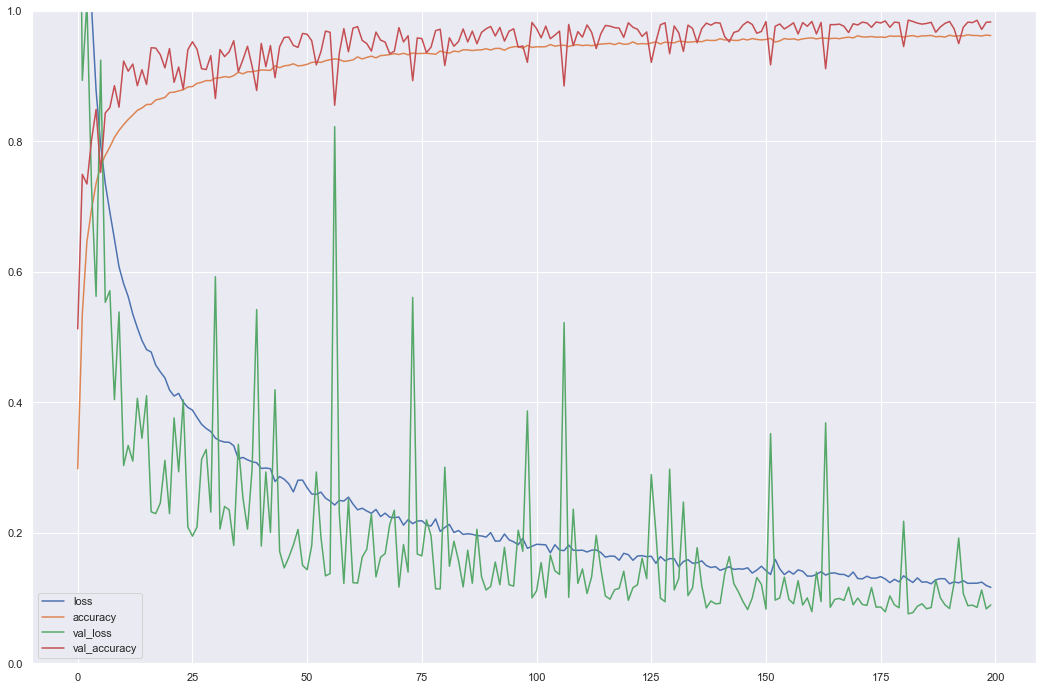

In [37]:
pd.DataFrame(history.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [38]:
y_pred = np.argmax(model.predict(x_test), axis=1)

print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.
format(accuracy_score(y_test,y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

- Test set accuracy: 98.34%
- Training accuracy: 96.23%
- Validation accuracy: 98.32%


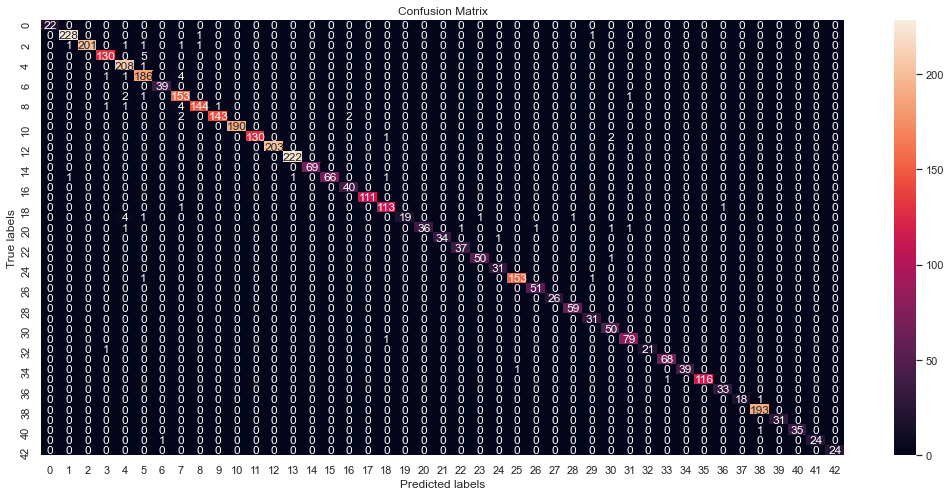

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix'); 

# Fitting a Convolutional Neural Network 

In [29]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(43, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [30]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

#Fitting the model
history = model.fit(x_train,y_train, epochs=20, batch_size=32,validation_data=(x_val,y_val))


Epoch 1/20
981/981 [==============================] - 60s 60ms/step - loss: 1.8451 - accuracy: 0.5752 - val_loss: 0.2835 - val_accuracy: 0.9424
Epoch 2/20
981/981 [==============================] - 62s 63ms/step - loss: 0.4165 - accuracy: 0.8811 - val_loss: 0.0912 - val_accuracy: 0.9770
Epoch 3/20
981/981 [==============================] - 58s 59ms/step - loss: 0.2904 - accuracy: 0.9195 - val_loss: 0.0815 - val_accuracy: 0.9788
Epoch 4/20
981/981 [==============================] - 59s 61ms/step - loss: 0.2549 - accuracy: 0.9303 - val_loss: 0.0853 - val_accuracy: 0.9799
Epoch 5/20
981/981 [==============================] - 55s 56ms/step - loss: 0.2316 - accuracy: 0.9406 - val_loss: 0.0638 - val_accuracy: 0.9857
Epoch 6/20
981/981 [==============================] - 57s 59ms/step - loss: 0.2232 - accuracy: 0.9440 - val_loss: 0.0725 - val_accuracy: 0.9842
Epoch 7/20
981/981 [==============================] - 55s 57ms/step - loss: 0.2399 - accuracy: 0.9418 - val_loss: 0.0539 - val_accuracy:

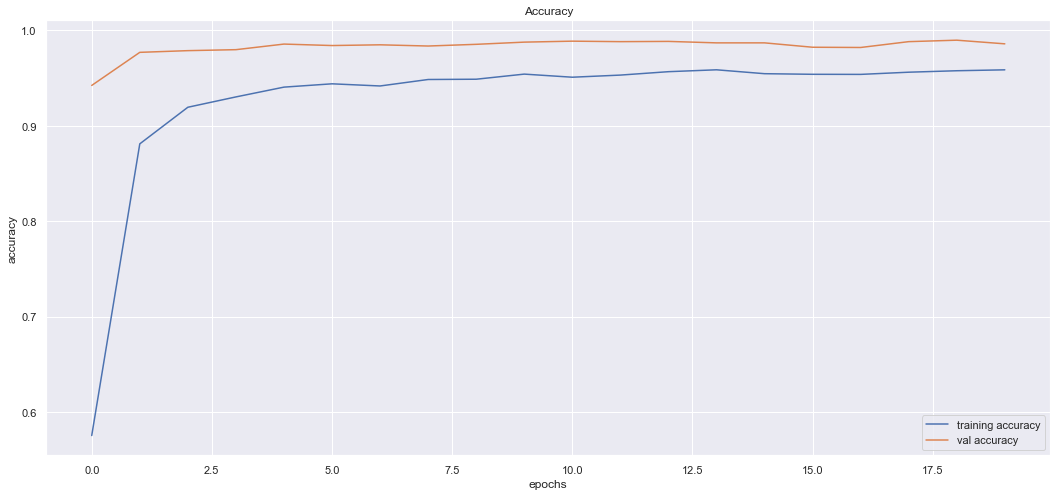

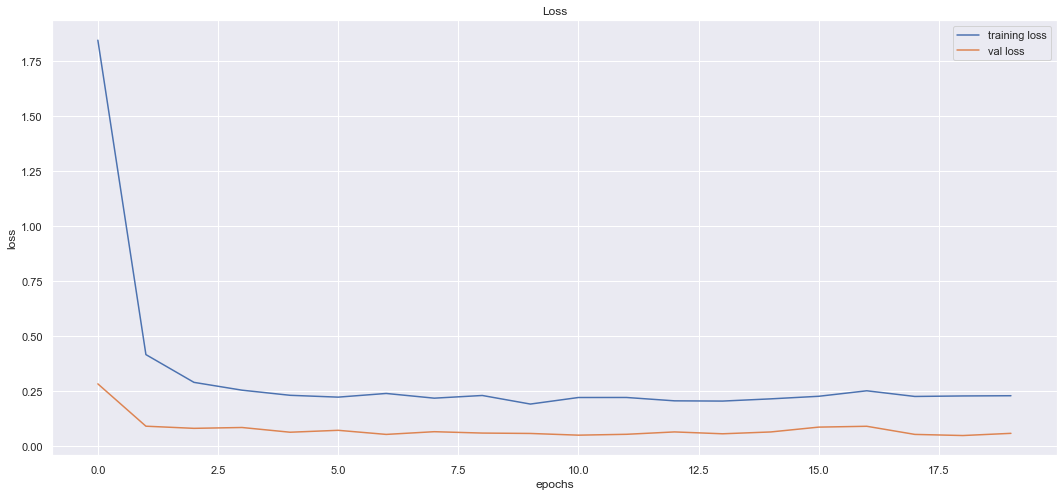

In [33]:
# Model evaluation 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [34]:
#y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.
format(accuracy_score(y_test,y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

- Test set accuracy: 98.80%
- Training accuracy: 95.87%
- Validation accuracy: 98.60%


A slight performance gain of 0.5 % over the classic MLP neural network. However, given how close we already are to 100% accuracy this can be interpreted as quite impressive as well - cutting down the loss by over 30%.